In [1]:
import threading
import multiprocessing
import numpy as np
import os
import sys
import time
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
mat_X = np.matrix(np.random.randint(1,100,size=(1000,1000)))
mat_X

matrix([[57, 31, 94, ...,  2, 59, 56],
        [88, 75, 21, ..., 92, 64, 20],
        [91, 79, 99, ..., 57,  8,  7],
        ...,
        [40, 25, 90, ..., 72, 95, 47],
        [57, 41, 86, ..., 73, 76, 76],
        [10, 10, 16, ..., 28, 61, 89]])

In [3]:
mat_X.shape

(1000, 1000)

In [4]:
mat_list = []
for i in range(100):
    mat_list.append(np.matrix(np.random.randint(1,100,size=(1000,1000))))

In [6]:
len(mat_list)

100

In [7]:
mat_list[0]

matrix([[ 3, 58, 67, ..., 63, 24, 66],
        [18, 35, 10, ..., 31, 84, 54],
        [96, 13, 60, ..., 56, 74, 56],
        ...,
        [89, 28, 98, ..., 70, 38, 76],
        [62,  1, 76, ..., 28, 18, 68],
        [51, 51, 66, ..., 30, 70, 17]])

In [8]:
mat_list[0].shape

(1000, 1000)

In [9]:
os.cpu_count()        # no of cores

16

In [10]:
active_threads = threading.active_count()
active_threads

6

In [11]:
ans_list = []

In [12]:
def task(mat_X, mat_A):
    global ans_list
    ans_list.append(np.dot(mat_X,mat_A))

## Threads = 1

In [13]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//1):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t1.start()
    j += 1
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(1)

total_time_1_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_1_cores)

iteration 0
time taken: 0.6274311542510986
iteration 1
time taken: 0.6187272071838379
iteration 2
time taken: 0.6384475231170654
iteration 3
time taken: 0.6364929676055908
iteration 4
time taken: 0.6178629398345947
iteration 5
time taken: 0.6224613189697266
iteration 6
time taken: 0.6290915012359619
iteration 7
time taken: 0.6242578029632568
iteration 8
time taken: 0.6333234310150146
iteration 9
time taken: 0.6244583129882812
iteration 10
time taken: 0.6438784599304199
iteration 11
time taken: 0.6483445167541504
iteration 12
time taken: 0.6360020637512207
iteration 13
time taken: 0.6322317123413086
iteration 14
time taken: 0.6183397769927979
iteration 15
time taken: 0.6244230270385742
iteration 16
time taken: 0.622473955154419
iteration 17
time taken: 0.6330864429473877
iteration 18
time taken: 0.6220192909240723
iteration 19
time taken: 0.6150586605072021
iteration 20
time taken: 0.626396894454956
iteration 21
time taken: 0.619645357131958
iteration 22
time taken: 0.6191322803497314
i

In [14]:
total_time_1_cores

63.8443877696991

## Threads = 2

In [15]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//2):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t2 = threading.Thread(target = task, args = (mat_X,mat_list[j+1]))
    t1.start()
    t2.start()
    j += 2
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(0.05)

total_time_2_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_2_cores)

iteration 0
time taken: 0.6677372455596924
iteration 1
time taken: 0.6558737754821777
iteration 2
time taken: 0.6657512187957764
iteration 3
time taken: 0.6528897285461426
iteration 4
time taken: 0.65962815284729
iteration 5
time taken: 0.6666271686553955
iteration 6
time taken: 0.7085237503051758
iteration 7
time taken: 0.6733925342559814
iteration 8
time taken: 0.6878194808959961
iteration 9
time taken: 0.6872227191925049
iteration 10
time taken: 0.6807224750518799
iteration 11
time taken: 0.6947028636932373
iteration 12
time taken: 0.7357957363128662
iteration 13
time taken: 0.7025737762451172
iteration 14
time taken: 0.7003214359283447
iteration 15
time taken: 0.7082152366638184
iteration 16
time taken: 0.6944661140441895
iteration 17
time taken: 0.6873495578765869
iteration 18
time taken: 0.7085704803466797
iteration 19
time taken: 0.7083394527435303
iteration 20
time taken: 0.7056894302368164
iteration 21
time taken: 0.7177674770355225
iteration 22
time taken: 0.6946296691894531


In [16]:
total_time_2_cores

34.024874210357666

## Threads = 3

In [17]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//3):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t2 = threading.Thread(target = task, args = (mat_X,mat_list[j+1]))
    t3 = threading.Thread(target = task, args = (mat_X,mat_list[j+2]))
    t1.start()
    t2.start()
    t3.start()
    j += 3
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(0.05)

total_time_3_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_3_cores)

iteration 0
time taken: 0.6879894733428955
iteration 1
time taken: 0.7077300548553467
iteration 2
time taken: 0.7083406448364258
iteration 3
time taken: 0.7639832496643066
iteration 4
time taken: 0.753373384475708
iteration 5
time taken: 0.7361059188842773
iteration 6
time taken: 0.6912446022033691
iteration 7
time taken: 0.7537972927093506
iteration 8
time taken: 0.7459170818328857
iteration 9
time taken: 0.7361996173858643
iteration 10
time taken: 0.7013986110687256
iteration 11
time taken: 0.7221460342407227
iteration 12
time taken: 0.7153995037078857
iteration 13
time taken: 0.7221167087554932
iteration 14
time taken: 0.6945388317108154
iteration 15
time taken: 0.7014412879943848
iteration 16
time taken: 0.7220985889434814
iteration 17
time taken: 0.7152941226959229
iteration 18
time taken: 0.78487229347229
iteration 19
time taken: 0.7082791328430176
iteration 20
time taken: 0.7221555709838867
iteration 21
time taken: 0.6875259876251221
iteration 22
time taken: 0.7152547836303711
i

In [18]:
total_time_3_cores

23.813010692596436

## Threads = 4

In [19]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//4):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t2 = threading.Thread(target = task, args = (mat_X,mat_list[j+1]))
    t3 = threading.Thread(target = task, args = (mat_X,mat_list[j+2]))
    t4 = threading.Thread(target = task, args = (mat_X,mat_list[j+3]))
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    j += 4
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(0.01)

total_time_4_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_4_cores)

iteration 0
time taken: 0.839118480682373
iteration 1
time taken: 0.8193919658660889
iteration 2
time taken: 0.8531897068023682
iteration 3
time taken: 0.8022994995117188
iteration 4
time taken: 0.9210522174835205
iteration 5
time taken: 0.8194072246551514
iteration 6
time taken: 0.8841073513031006
iteration 7
time taken: 0.8173975944519043
iteration 8
time taken: 0.8471274375915527
iteration 9
time taken: 0.8472659587860107
iteration 10
time taken: 0.8335392475128174
iteration 11
time taken: 0.8539707660675049
iteration 12
time taken: 0.8407013416290283
iteration 13
time taken: 0.8875875473022461
iteration 14
time taken: 0.8348333835601807
iteration 15
time taken: 0.8043677806854248
iteration 16
time taken: 0.8619041442871094
iteration 17
time taken: 0.8279120922088623
iteration 18
time taken: 0.7826333045959473
iteration 19
time taken: 0.8406448364257812
iteration 20
time taken: 0.8471956253051758
iteration 21
time taken: 0.8611433506011963
iteration 22
time taken: 0.8333101272583008

In [20]:
total_time_4_cores

21.003820419311523

## Threads = 5

In [21]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//5):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t2 = threading.Thread(target = task, args = (mat_X,mat_list[j+1]))
    t3 = threading.Thread(target = task, args = (mat_X,mat_list[j+2]))
    t4 = threading.Thread(target = task, args = (mat_X,mat_list[j+3]))
    t5 = threading.Thread(target = task, args = (mat_X,mat_list[j+4]))
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    t5.start()
    j += 5
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(0.01)

total_time_5_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_5_cores)

iteration 0
time taken: 0.9512279033660889
iteration 1
time taken: 0.8801374435424805
iteration 2
time taken: 0.9345216751098633
iteration 3
time taken: 0.8852128982543945
iteration 4
time taken: 0.8985564708709717
iteration 5
time taken: 0.8885862827301025
iteration 6
time taken: 0.8786015510559082
iteration 7
time taken: 0.9185681343078613
iteration 8
time taken: 0.8832383155822754
iteration 9
time taken: 0.8868281841278076
iteration 10
time taken: 0.8655962944030762
iteration 11
time taken: 0.909491777420044
iteration 12
time taken: 0.9134743213653564
iteration 13
time taken: 0.9181637763977051
iteration 14
time taken: 0.9771440029144287
iteration 15
time taken: 0.9256861209869385
iteration 16
time taken: 0.9060225486755371
iteration 17
time taken: 0.8922960758209229
iteration 18
time taken: 0.8846778869628906
iteration 19
time taken: 0.9417941570281982

Total time taken:  18.14002251625061


In [22]:
total_time_5_cores

18.14002251625061

## Threads = 6

In [23]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//6):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t2 = threading.Thread(target = task, args = (mat_X,mat_list[j+1]))
    t3 = threading.Thread(target = task, args = (mat_X,mat_list[j+2]))
    t4 = threading.Thread(target = task, args = (mat_X,mat_list[j+3]))
    t5 = threading.Thread(target = task, args = (mat_X,mat_list[j+4]))
    t6 = threading.Thread(target = task, args = (mat_X,mat_list[j+5]))
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    t5.start()
    t6.start()
    j += 6
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(0.01)

total_time_6_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_6_cores)

iteration 0
time taken: 0.9719691276550293
iteration 1
time taken: 0.9997749328613281
iteration 2
time taken: 0.9740502834320068
iteration 3
time taken: 0.9778757095336914
iteration 4
time taken: 0.9561915397644043
iteration 5
time taken: 0.9428589344024658
iteration 6
time taken: 0.9459247589111328
iteration 7
time taken: 0.94610595703125
iteration 8
time taken: 0.9668419361114502
iteration 9
time taken: 0.9749922752380371
iteration 10
time taken: 0.9941372871398926
iteration 11
time taken: 0.978870153427124
iteration 12
time taken: 0.958153486251831
iteration 13
time taken: 0.9252433776855469
iteration 14
time taken: 0.9469170570373535
iteration 15
time taken: 0.9502711296081543

Total time taken:  15.41027021408081


In [24]:
total_time_6_cores

15.41027021408081

## Threads = 7

In [25]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//7):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t2 = threading.Thread(target = task, args = (mat_X,mat_list[j+1]))
    t3 = threading.Thread(target = task, args = (mat_X,mat_list[j+2]))
    t4 = threading.Thread(target = task, args = (mat_X,mat_list[j+3]))
    t5 = threading.Thread(target = task, args = (mat_X,mat_list[j+4]))
    t6 = threading.Thread(target = task, args = (mat_X,mat_list[j+5]))
    t7 = threading.Thread(target = task, args = (mat_X,mat_list[j+6]))
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    t5.start()
    t6.start()
    t7.start()
    j += 7
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(0.01)

total_time_7_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_7_cores)

iteration 0
time taken: 1.0719239711761475
iteration 1
time taken: 1.2562155723571777
iteration 2
time taken: 1.0813627243041992
iteration 3
time taken: 1.0365452766418457
iteration 4
time taken: 1.1300334930419922
iteration 5
time taken: 1.0406451225280762
iteration 6
time taken: 1.0378844738006592
iteration 7
time taken: 1.0918128490447998
iteration 8
time taken: 1.0716309547424316
iteration 9
time taken: 1.029644250869751
iteration 10
time taken: 1.025710105895996
iteration 11
time taken: 1.1128621101379395
iteration 12
time taken: 1.0489771366119385
iteration 13
time taken: 1.0579214096069336

Total time taken:  15.093169450759888


In [26]:
total_time_7_cores

15.093169450759888

## Threads = 8

In [27]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//8):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t2 = threading.Thread(target = task, args = (mat_X,mat_list[j+1]))
    t3 = threading.Thread(target = task, args = (mat_X,mat_list[j+2]))
    t4 = threading.Thread(target = task, args = (mat_X,mat_list[j+3]))
    t5 = threading.Thread(target = task, args = (mat_X,mat_list[j+4]))
    t6 = threading.Thread(target = task, args = (mat_X,mat_list[j+5]))
    t7 = threading.Thread(target = task, args = (mat_X,mat_list[j+6]))
    t8 = threading.Thread(target = task, args = (mat_X,mat_list[j+7]))
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    t5.start()
    t6.start()
    t7.start()
    t8.start()
    j += 8
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(0.01)

total_time_8_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_8_cores)

iteration 0
time taken: 1.161412000656128
iteration 1
time taken: 1.22981595993042
iteration 2
time taken: 1.3437187671661377
iteration 3
time taken: 1.339951515197754
iteration 4
time taken: 1.198333978652954
iteration 5
time taken: 1.2152445316314697
iteration 6
time taken: 1.2500338554382324
iteration 7
time taken: 1.2291357517242432
iteration 8
time taken: 1.2486083507537842
iteration 9
time taken: 1.167151689529419
iteration 10
time taken: 1.1811933517456055
iteration 11
time taken: 1.2619032859802246

Total time taken:  14.826599597930908


In [28]:
total_time_8_cores

14.826599597930908

## Threads = 16

In [29]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//16):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t2 = threading.Thread(target = task, args = (mat_X,mat_list[j+1]))
    t3 = threading.Thread(target = task, args = (mat_X,mat_list[j+2]))
    t4 = threading.Thread(target = task, args = (mat_X,mat_list[j+3]))
    t5 = threading.Thread(target = task, args = (mat_X,mat_list[j+4]))
    t6 = threading.Thread(target = task, args = (mat_X,mat_list[j+5]))
    t7 = threading.Thread(target = task, args = (mat_X,mat_list[j+6]))
    t8 = threading.Thread(target = task, args = (mat_X,mat_list[j+7]))
    t9 = threading.Thread(target = task, args = (mat_X,mat_list[j+8]))
    t10 = threading.Thread(target = task, args = (mat_X,mat_list[j+9]))
    t11 = threading.Thread(target = task, args = (mat_X,mat_list[j+10]))
    t12 = threading.Thread(target = task, args = (mat_X,mat_list[j+11]))
    t13 = threading.Thread(target = task, args = (mat_X,mat_list[j+12]))
    t14 = threading.Thread(target = task, args = (mat_X,mat_list[j+13]))
    t15 = threading.Thread(target = task, args = (mat_X,mat_list[j+14]))
    t16 = threading.Thread(target = task, args = (mat_X,mat_list[j+15]))
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    t5.start()
    t6.start()
    t7.start()
    t8.start()
    t9.start()
    t10.start()
    t11.start()
    t12.start()
    t13.start()
    t14.start()
    t15.start()
    t16.start()
    j += 16
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(0.01)

total_time_16_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_16_cores)

iteration 0
time taken: 2.2851579189300537
iteration 1
time taken: 2.4048891067504883
iteration 2
time taken: 2.552974224090576
iteration 3
time taken: 2.381998300552368
iteration 4
time taken: 2.3332138061523438
iteration 5
time taken: 2.373262405395508

Total time taken:  14.33189845085144


In [30]:
total_time_16_cores

14.33189845085144

## Threads = 20

In [35]:
j = 0
start_time = time.time()
for i in range(len(mat_list)//20):
    iter_time = time.time()
    t1 = threading.Thread(target = task, args = (mat_X,mat_list[j]))
    t2 = threading.Thread(target = task, args = (mat_X,mat_list[j+1]))
    t3 = threading.Thread(target = task, args = (mat_X,mat_list[j+2]))
    t4 = threading.Thread(target = task, args = (mat_X,mat_list[j+3]))
    t5 = threading.Thread(target = task, args = (mat_X,mat_list[j+4]))
    t6 = threading.Thread(target = task, args = (mat_X,mat_list[j+5]))
    t7 = threading.Thread(target = task, args = (mat_X,mat_list[j+6]))
    t8 = threading.Thread(target = task, args = (mat_X,mat_list[j+7]))
    t9 = threading.Thread(target = task, args = (mat_X,mat_list[j+8]))
    t10 = threading.Thread(target = task, args = (mat_X,mat_list[j+9]))
    t11 = threading.Thread(target = task, args = (mat_X,mat_list[j+10]))
    t12 = threading.Thread(target = task, args = (mat_X,mat_list[j+11]))
    t13 = threading.Thread(target = task, args = (mat_X,mat_list[j+12]))
    t14 = threading.Thread(target = task, args = (mat_X,mat_list[j+13]))
    t15 = threading.Thread(target = task, args = (mat_X,mat_list[j+14]))
    t16 = threading.Thread(target = task, args = (mat_X,mat_list[j+15]))
    t17 = threading.Thread(target = task, args = (mat_X,mat_list[j+16]))
    t18 = threading.Thread(target = task, args = (mat_X,mat_list[j+17]))
    t19 = threading.Thread(target = task, args = (mat_X,mat_list[j+18]))
    t20 = threading.Thread(target = task, args = (mat_X,mat_list[j+19]))
    t1.start()
    t2.start()
    t3.start()
    t4.start()
    t5.start()
    t6.start()
    t7.start()
    t8.start()
    t9.start()
    t10.start()
    t11.start()
    t12.start()
    t13.start()
    t14.start()
    t15.start()
    t16.start()
    t17.start()
    t18.start()
    t19.start()
    t20.start()
    j += 20
    print('iteration {}'.format(i))
    while True:
        if threading.active_count() == active_threads:
            print('time taken: {}'.format(time.time()-iter_time))
            break
        # else:
        #     print("Thread still running (left {}) ".format(threading.active_count() - active_threads))
        #     time.sleep(0.01)

total_time_20_cores = time.time() - start_time
print('\nTotal time taken: ',total_time_20_cores)

iteration 0
time taken: 2.9954845905303955
iteration 1
time taken: 3.0236194133758545
iteration 2
time taken: 2.817397117614746
iteration 3
time taken: 2.7577192783355713
iteration 4
time taken: 2.8677804470062256

Total time taken:  14.462140321731567


In [36]:
total_time_20_cores

14.462140321731567

#### It can be observed that time taken for 20 threads is greater than that for 16 threads (because my system has 16 cores...so number of threads more than 16 will lead to thread overload)

## Observations

In [41]:
total_time = []
cores = [1,2,3,4,5,6,7,8,16]
for i in cores:
    var_name = "total_time_{}_cores".format(i)
    total_time.append(globals()[var_name])

In [42]:
total_time

[63.8443877696991,
 34.024874210357666,
 23.813010692596436,
 21.003820419311523,
 18.14002251625061,
 15.41027021408081,
 15.093169450759888,
 14.826599597930908,
 14.33189845085144]

In [17]:
threads = [1,2,3,4,5,6,7,8,16,20]

In [18]:
total_time_taken = [63.8443877696991,
 34.024874210357666,
 23.813010692596436,
 21.003820419311523,
 18.14002251625061,
 15.41027021408081,
 15.093169450759888,
 14.826599597930908,
 14.33189845085144,14.462140321731567]

In [19]:
compare_df = pd.DataFrame({'Threads': threads, 'Time taken': total_time_taken})
compare_df

,Threads,Time taken
0,1,63.844388
1,2,34.024874
2,3,23.813011
3,4,21.003820
4,5,18.140023
5,6,15.410270
6,7,15.093169
7,8,14.826600
8,16,14.331898
9,20,14.462140


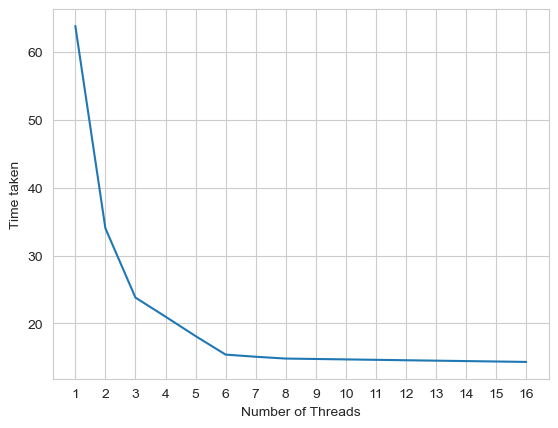

In [43]:
sns.set_style('whitegrid')
plt.plot(cores,total_time);
plt.xlabel('Number of Threads');
plt.ylabel('Time taken');
custom_ticks = list(range(1, 17))  
plt.xticks(custom_ticks);

#### It can be observed that the Total Time taken to execute the desired operation decreases as the number of threads increase (i.e. time taken being maximum for no. of threads = 1 and minimum for no. of threads = 16) 

## CPU Usage

### Initially

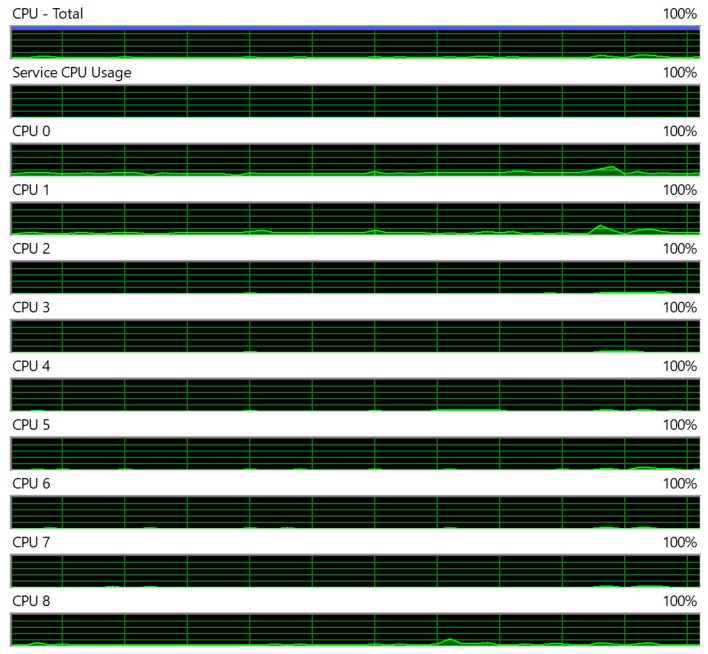

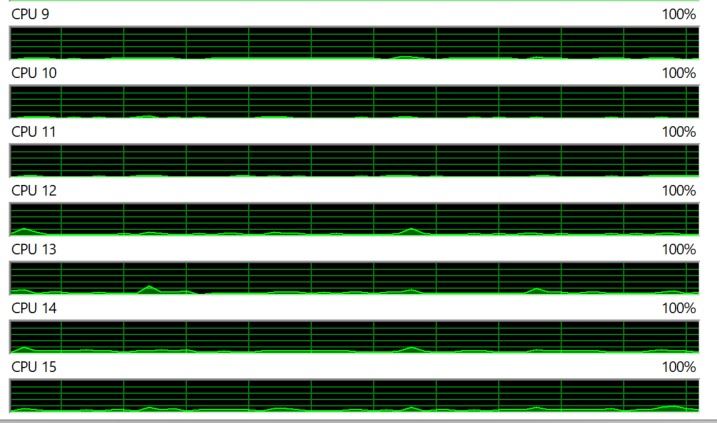

#### Initially it can be observed that all the cores are idle (with some background processes running)

### Running 16 threads

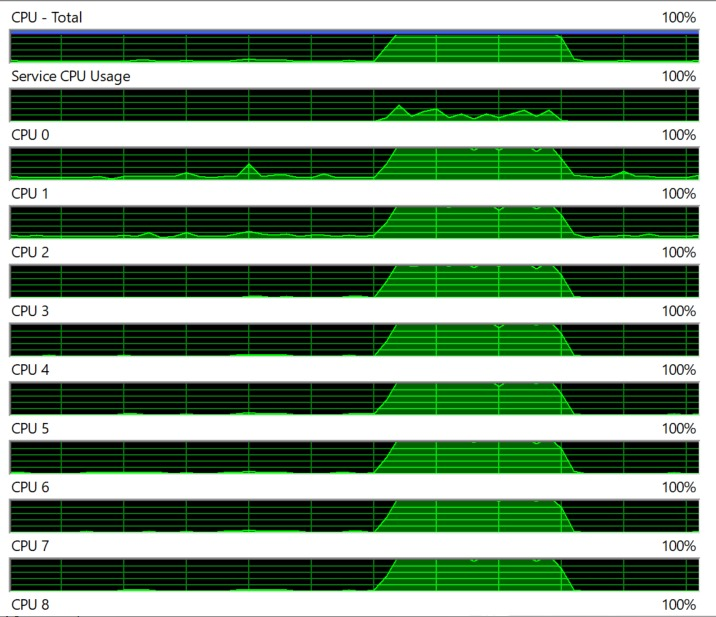

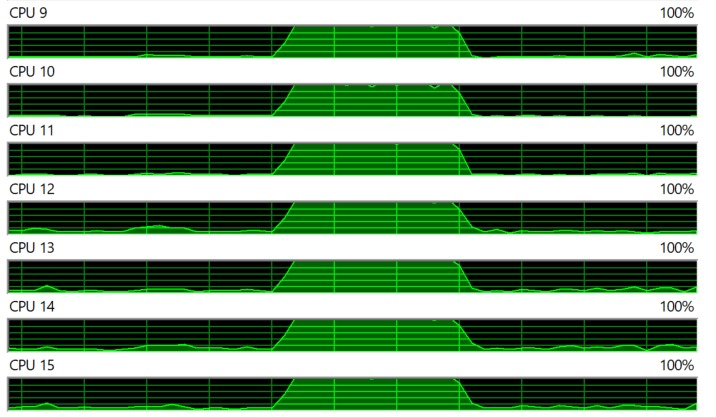

#### After running 16 threads, it can be observed that all the cores are simultaneously working (i.e. concept of multi-threading is being used) 

# Thank You!!